In [1]:
import torch
import PIL
import diffusers
from diffusers import AutoencoderKL, DDPMScheduler, DiffusionPipeline, UNet2DConditionModel
from diffusers.loaders import AttnProcsLayers
from diffusers.models.attention_processor import LoRAAttnProcessor
from diffusers.optimization import get_scheduler
from diffusers.utils import check_min_version, is_wandb_available
from diffusers.utils.import_utils import is_xformers_available

In [2]:
pretrained_model_name_or_path = "runwayml/stable-diffusion-v1-5"
weight_dtype = torch.float16
device = torch.device("cuda:0")
output_dir = 'lora_output'

In [3]:
pipeline = DiffusionPipeline.from_pretrained(
    pretrained_model_name_or_path, safety_checker = None, revision=None, torch_dtype=weight_dtype
)

pipeline = pipeline.to(device)

pipeline.unet.load_attn_procs(output_dir)

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/30 [00:00<?, ?it/s]

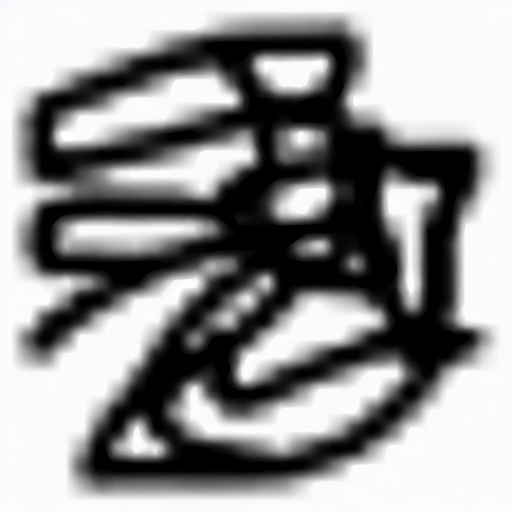

In [44]:
seed = 25238
generator = torch.Generator(device = device).manual_seed(seed)
validation_prompt = 'a scribble of a London'
lora_scale = 0.7
image = pipeline(validation_prompt, num_inference_steps=30, guidance_scale=7.5, generator=generator, cross_attention_kwargs={"scale": lora_scale}).images[0]
image